## K-nearest neighbors

- Use the same dataset as in previous exercise (voice.csv)
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called K-nearest neighbors for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & AI\voice.csv")

2 filter the data so that only the following columns will be selected: **meanfun** and **IQR**. Then split the dataset so that 75 % of the data will be used for training.

In [2]:
X = df[['meanfun', 'IQR']]
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.25,
    random_state=42)

3 Find the optimal value for k comparing possible values and error rate.

Optimal k value: 9
Minimum error rate: 0.0227


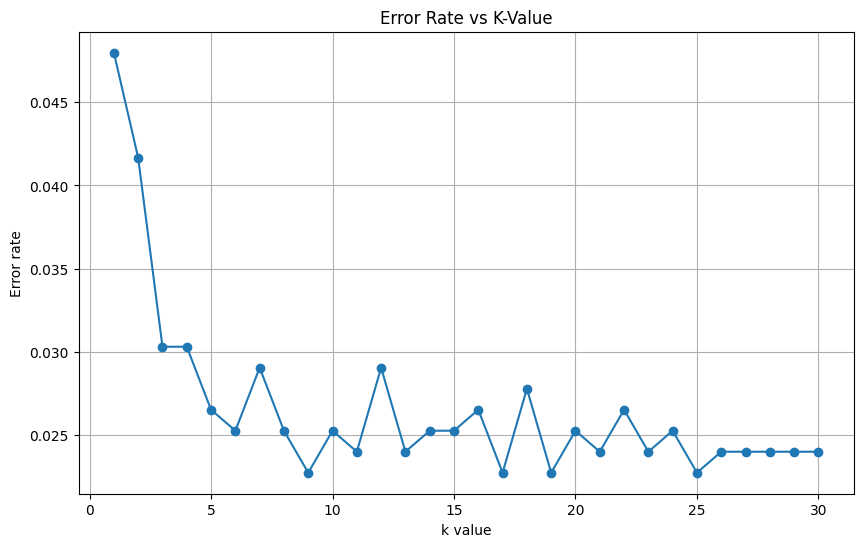

In [3]:
k_range = range(1, 31)
errors = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train)
   pred_k = knn.predict(X_test)
   error = 1 - knn.score(X_test, y_test)
   errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, 'o-')
plt.xlabel('k value')
plt.ylabel('Error rate')
plt.title('Error Rate vs K-Value')
plt.grid(True)

optimal_k = k_range[np.argmin(errors)]
print(f"Optimal k value: {optimal_k}")
print(f"Minimum error rate: {min(errors):.4f}")

plt.show()

4 Define a function and include the following operations inside the function:
   - Define a classifier
   - Fit the data for the classifier
   - Calculate minimum and maximum values for boundaries for meanfun and IQR
   - Run predictions
   - Draw a chart from predicted data utilising previously defined colormaps

Utilise your function and call it using the optimal k value chosen previously.

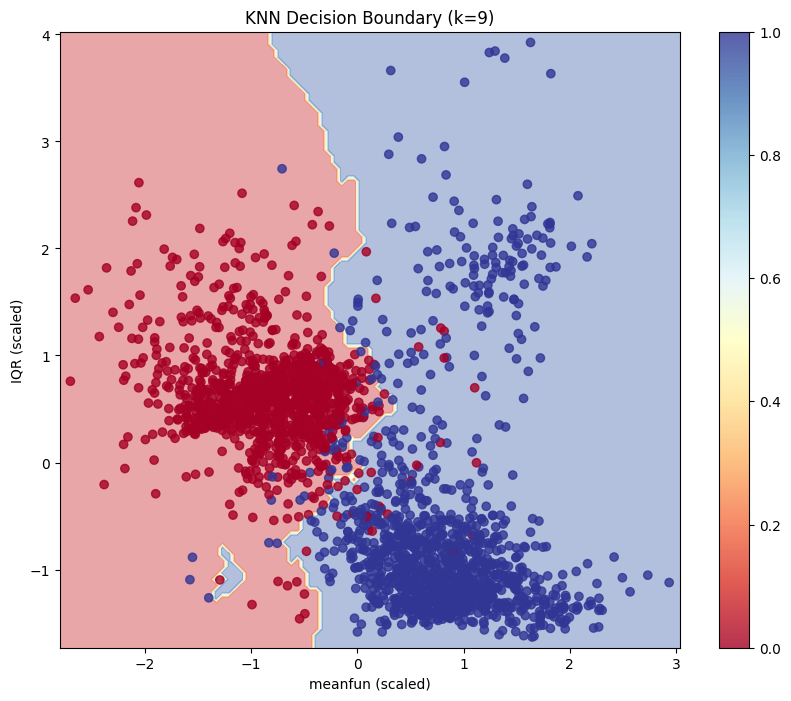

In [4]:
def plot_knn_decision_boundary(X_train, y_train, k):
   
    y_numeric = np.where(y_train == 'male', 0, 1)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
   
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(mesh_points)
    Z = np.where(Z == 'male', 0, 1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], 
                         c=y_numeric,
                         cmap='RdYlBu', 
                         alpha=0.8)
    
    plt.xlabel('meanfun (scaled)')
    plt.ylabel('IQR (scaled)')
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.colorbar(scatter)
    plt.show()

plot_knn_decision_boundary(X_train, y_train, k=9)